In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import matplotlib.cm as cm, matplotlib.font_manager as fm
from datetime import datetime as dt
from shapely.geometry import Polygon
#from geopy.distance import great_circle
from geopandas import GeoDataFrame
from sklearn.cluster import DBSCAN
 
df = pd.read_csv('navwarnings-dates-centroids.csv')
 
title_font = fm.FontProperties(family='Bitstream Vera Sans', style='normal', size=15, weight='normal', stretch='normal')
label_font = fm.FontProperties(family='Bitstream Vera Sans', style='normal', size=12, weight='normal', stretch='normal')
ticks_font = fm.FontProperties(family='Bitstream Vera Sans', style='normal', size=10, weight='normal', stretch='normal')
annotation_font = fm.FontProperties(family='Bitstream Vera Sans', style='normal', size=10, weight='normal', stretch='normal')
 
axis_bgcolor = '#f0f0f0'

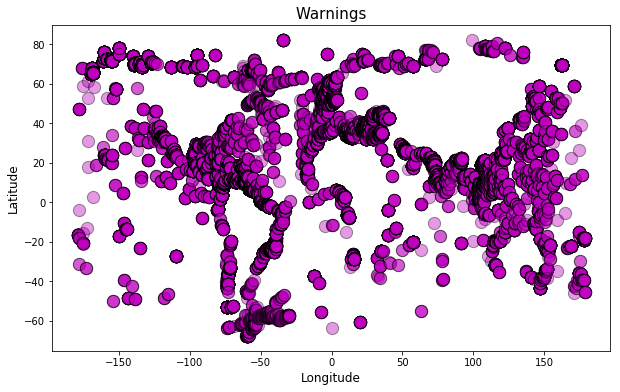

In [2]:
# plot the reduced set of coordinate points
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
rs_scatter = ax.scatter(df['lon_centroid'],df['lat_centroid'], c='m', edgecolor='k', alpha=.4, s=150)
 
# set axis labels, tick labels, and title
for label in ax.get_xticklabels():
    label.set_fontproperties(ticks_font)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)
ax.set_title('Warnings', fontproperties=title_font)
ax.set_xlabel('Longitude', fontproperties=label_font)
ax.set_ylabel('Latitude', fontproperties=label_font)
 
 
plt.show()

In [11]:
db = DBSCAN(eps = .5, min_samples = 15).fit(df)
labels = db.fit_predict(df)


In [12]:
df['labels'] = labels

In [13]:
df.head()

,lon_centroid,lat_centroid,labels
0,-179.150000,-16.091666,-1
1,-179.106667,-16.743333,0
2,-179.106667,-16.743333,0
3,-179.106667,-16.743333,0
4,-179.106667,-16.743333,0


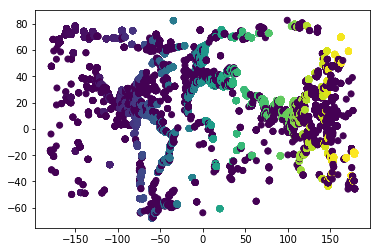

In [10]:
plt.scatter(df['lon_centroid'], df['lat_centroid'], c=df['labels'])

In [4]:
coords = df.as_matrix(columns=['lat_centroid', 'lon_centroid'])
db = DBSCAN(eps=0.2, min_samples=4, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))
y_db = db.fit_predict(distance_matrix)

X['cluster'] = y_db

plt.scatter(X['lat'], X['lng'], c=X['cluster'])
plt.show()

/Users/iv/anaconda3/envs/GIS/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


NameError: name 'distance_matrix' is not defined